<a href="https://colab.research.google.com/github/raghusbhat/colab/blob/main/Depth_Anything_latest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade git+https://github.com/huggingface/transformers.git
!pip install Pillow
!pip install numpy
!pip install numpy opencv-python-headless matplotlib

  Cloning https://github.com/huggingface/transformers.git to /tmp/pip-req-build-422jvtxd
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/transformers.git /tmp/pip-req-build-422jvtxd
  Resolved https://github.com/huggingface/transformers.git to commit 9e599d1d944c3e58b9f6ed6681e87cc32256af7c
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for transformers: filename=transformers-4.43.0.dev0-py3-none-any.whl size=9343813 sha256=eda5a3dd606f8ac12b48bdb84c5e16cc063b2e730f89ec6435e3209f203d3b0f
  Stored in directory: /tmp/pip-ephem-wheel-cache-awzyz1h2/wheels/e7/9c/5b/e1a9c8007c343041e61cc484433d512ea9274272e3fcbe7c16
Successfully built transformers
  Attempting uninstall: transformers
    Found existing installation: transformers 4.41.2
    Uninstalling transformers-4.41.2:
      Successfully uninstalled transformers-4.41.2


ERROR: Operation cancelled by user


In [ ]:
# Load the necessary libraries
import os
HOME = os.getcwd()
from PIL import Image
import requests
from transformers import pipeline
import numpy as np
import cv2
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

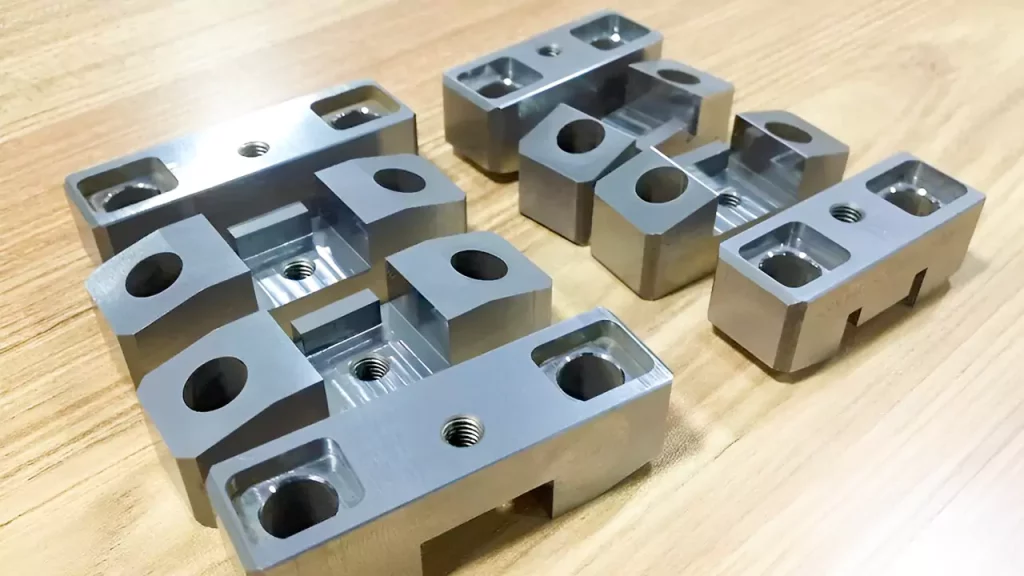

In [ ]:
# Load the image & visualize
url = 'https://prototool.com/wp-content/uploads/2023/03/Injection-Mold-Parts-Such-as-Core-Insert-Lifter-and-Slide-1024x576.webp'
image = Image.open(requests.get(url, stream=True).raw)
image

In [ ]:
# Load the depth estimation pipeline
pipe = pipeline(task="depth-estimation", model="LiheYoung/depth-anything-base-hf", device=0)  # Use GPU

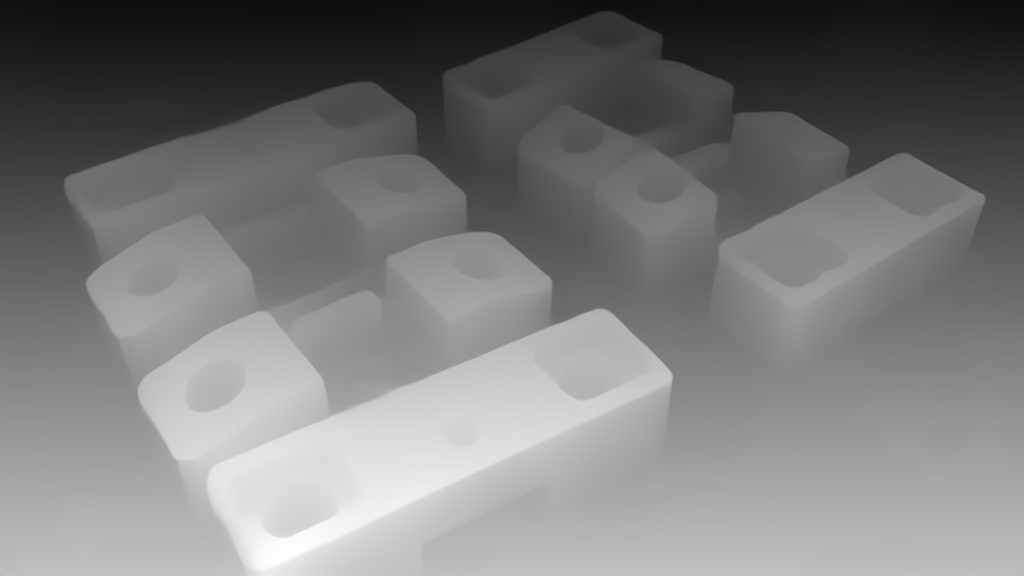

In [ ]:
# Get the depth estimation result & visualize
result = pipe(image)
depth_map = result["depth"]
depth_map

In [ ]:
# Convert the depth map to a numpy array for easier manipulation
depth_map_np = np.array(depth_map)

In [ ]:
# Load the image for keypoint detection
image_cv = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2GRAY)

In [ ]:
# ORB keypoint detection
orb = cv2.ORB_create()
keypoints, descriptors = orb.detectAndCompute(image_cv, None)

In [ ]:
# Draw keypoints
image_with_keypoints = cv2.drawKeypoints(image_cv, keypoints, None, color=(0, 255, 0), flags=0)

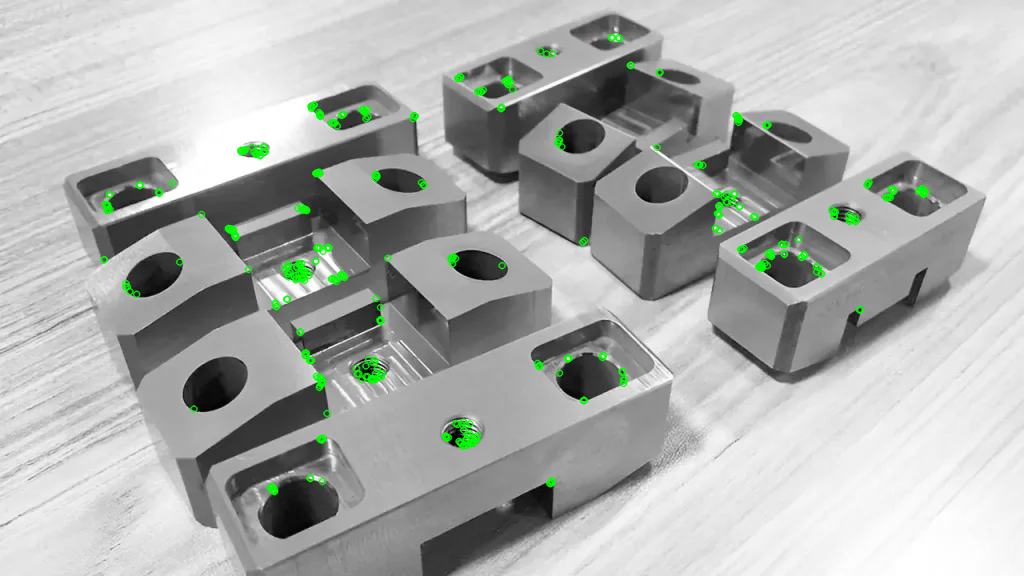

In [ ]:
# Display keypoints
from google.colab.patches import cv2_imshow
cv2_imshow(image_with_keypoints)

In [ ]:
# Get the dimensions of the depth map
height, width = depth_map_np.shape
height, width

(576, 1024)

In [ ]:
# Create arrays for x and y coordinates
y_coords, x_coords = np.meshgrid(np.arange(height), np.arange(width), indexing='ij')

In [ ]:
# Flatten the arrays to create a list of coordinates
x_coords_flat = x_coords.flatten()
y_coords_flat = y_coords.flatten()
z_coords_flat = depth_map_np.flatten()
x_coords_flat, y_coords_flat, z_coords_flat

(array([   0,    1,    2, ..., 1021, 1022, 1023]),
 array([  0,   0,   0, ..., 575, 575, 575]),
 array([ 17,  17,  17, ..., 188, 186, 173], dtype=uint8))

In [ ]:
# Combine x, y, z coordinates into a single array
coordinates = np.vstack((x_coords_flat, y_coords_flat, z_coords_flat)).T
coordinates

array([[   0,    0,   17],
       [   1,    0,   17],
       [   2,    0,   17],
       ...,
       [1021,  575,  188],
       [1022,  575,  186],
       [1023,  575,  173]])

In [ ]:
# Print the first 10 coordinates as an example
for coord in coordinates[:50]:
    print(f"x: {coord[0]}, y: {coord[1]}, z: {coord[2]}")

x: 0, y: 0, z: 17
x: 1, y: 0, z: 17
x: 2, y: 0, z: 17
x: 3, y: 0, z: 17
x: 4, y: 0, z: 17
x: 5, y: 0, z: 17
x: 6, y: 0, z: 17
x: 7, y: 0, z: 17
x: 8, y: 0, z: 17
x: 9, y: 0, z: 17
x: 10, y: 0, z: 17
x: 11, y: 0, z: 17
x: 12, y: 0, z: 17
x: 13, y: 0, z: 17
x: 14, y: 0, z: 17
x: 15, y: 0, z: 17
x: 16, y: 0, z: 17
x: 17, y: 0, z: 17
x: 18, y: 0, z: 17
x: 19, y: 0, z: 17
x: 20, y: 0, z: 17
x: 21, y: 0, z: 17
x: 22, y: 0, z: 17
x: 23, y: 0, z: 17
x: 24, y: 0, z: 17
x: 25, y: 0, z: 17
x: 26, y: 0, z: 17
x: 27, y: 0, z: 17
x: 28, y: 0, z: 17
x: 29, y: 0, z: 17
x: 30, y: 0, z: 17
x: 31, y: 0, z: 17
x: 32, y: 0, z: 17
x: 33, y: 0, z: 17
x: 34, y: 0, z: 17
x: 35, y: 0, z: 17
x: 36, y: 0, z: 16
x: 37, y: 0, z: 16
x: 38, y: 0, z: 16
x: 39, y: 0, z: 16
x: 40, y: 0, z: 16
x: 41, y: 0, z: 16
x: 42, y: 0, z: 16
x: 43, y: 0, z: 16
x: 44, y: 0, z: 16
x: 45, y: 0, z: 16
x: 46, y: 0, z: 15
x: 47, y: 0, z: 15
x: 48, y: 0, z: 15
x: 49, y: 0, z: 15


In [ ]:
# Function to visualize the central axis on the image
def visualize_central_axis(image, keypoints, depth_map_np):
    # Calculate the central axis in 3D space using keypoints
    keypoints_depth = [(kp.pt[0], kp.pt[1], depth_map_np[int(kp.pt[1]), int(kp.pt[0])]) for kp in keypoints]

    # Check if there are enough keypoints
    if len(keypoints_depth) < 2:
        print("Not enough keypoints detected to calculate the central axis.")
        return

    # Calculate central axis coordinates
    x1, y1, z1 = keypoints_depth[0]
    x2, y2, z2 = keypoints_depth[1]
    central_axis_x = (x1 + x2) / 2
    central_axis_y = (y1 + y2) / 2
    central_axis_z = (z1 + z2) / 2
    print(f"Central Axis Coordinates (x, y, z): ({central_axis_x}, {central_axis_y}, {central_axis_z})")

    # Plot the original image with keypoints
    image_with_keypoints = cv2.drawKeypoints(np.array(image), keypoints, None, color=(0, 255, 0), flags=0)
    plt.figure(figsize=(10, 10))
    plt.imshow(image_with_keypoints)

    # Plot the central axis on the image
    plt.scatter([x1, x2], [y1, y2], c='r', marker='x')  # keypoints
    plt.plot([x1, x2], [y1, y2], 'r-')  # central axis line

    # Display the plot
    plt.title("Image with Keypoints and Central Axis")
    plt.show()

    # Visualize in 3D
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter([x1, x2], [y1, y2], [z1, z2], c='r', marker='x')  # keypoints
    ax.plot([x1, x2], [y1, y2], [z1, z2], 'r-')  # central axis line
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Depth (Z)')
    ax.set_title('3D Visualization of Keypoints and Central Axis')
    plt.show()

Central Axis Coordinates (x, y, z): (562.5, 184.5, 106.0)


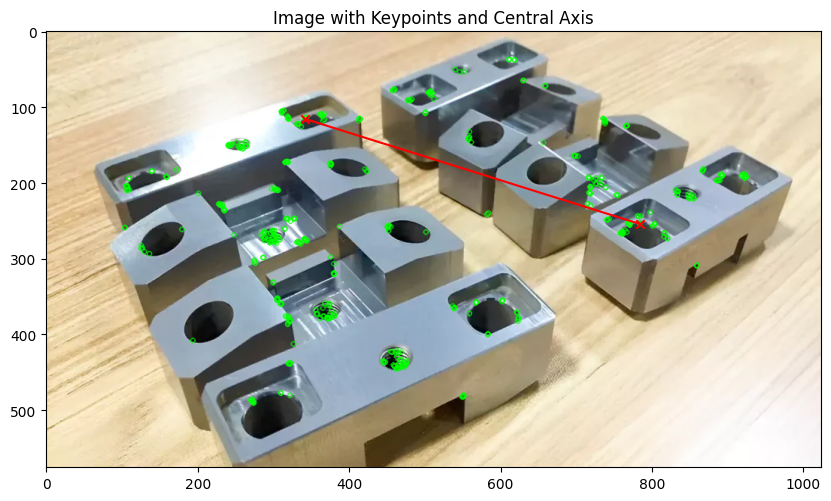

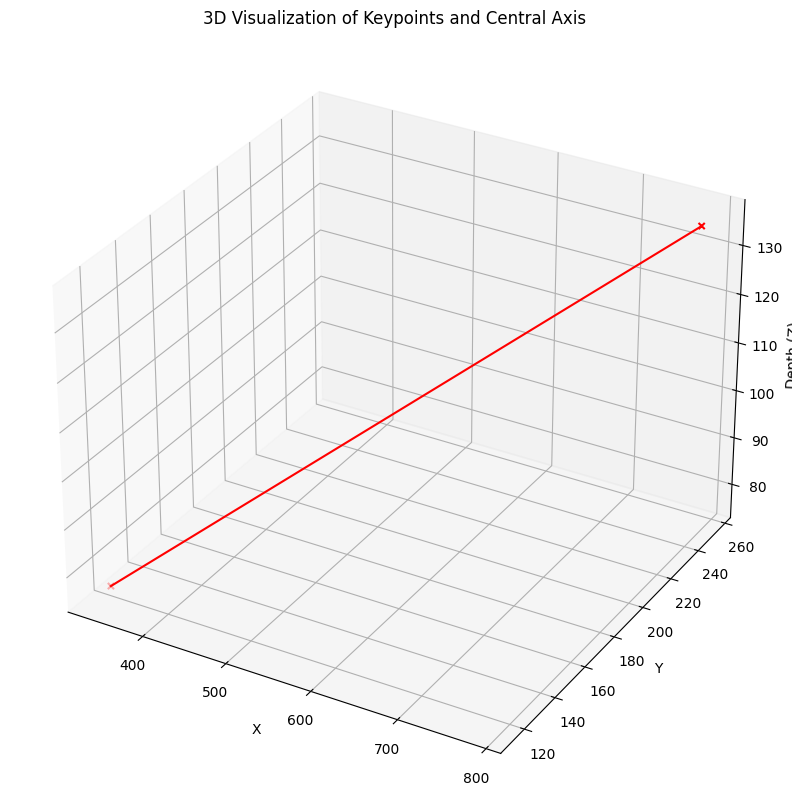

In [ ]:
# Call the function to visualize the central axis
visualize_central_axis(image, keypoints, depth_map_np)

In [ ]:
# Calculate central axis using depth information and keypoints
keypoints_depth = [(kp.pt[0], kp.pt[1], depth_map_np[int(kp.pt[1]), int(kp.pt[0])]) for kp in keypoints]

In [ ]:
# Calculate central axis in 3D space (example, using the first two keypoints)
if len(keypoints_depth) >= 2:
    x1, y1, z1 = keypoints_depth[0]
    x2, y2, z2 = keypoints_depth[1]
    central_axis_x = (x1 + x2) / 2
    central_axis_y = (y1 + y2) / 2
    central_axis_z = (z1 + z2) / 2
    print(f"Central Axis Coordinates (x, y, z): ({central_axis_x}, {central_axis_y}, {central_axis_z})")
else:
    print("Not enough keypoints detected to calculate the central axis.")

Central Axis Coordinates (x, y, z): (562.5, 184.5, 106.0)
